# Import thư viện

In [1]:
!pip install catboost
!pip install category-encoders==2.6.0
# !pip install --upgrade xgboost==2.0.3
!pip install scikit-learn==1.3.2

In [2]:
# Thư viện cơ bản
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Scikit-learn: Pipeline, Transformers, Models, và Evaluation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Thư viện mã hóa (Encoding)
from category_encoders import TargetEncoder


# Xác đinh vấn đề

## Giới thiệu chung

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Sustainable_Development_Goals.svg/768px-Sustainable_Development_Goals.svg.png)

**"Đảm bảo cuộc sống khỏe mạnh và thúc đẩy hạnh phúc cho mọi người ở mọi lứa tuổi"** là tiêu chí thứ 3 trong **[17 tiêu chí phát triền bền vững](https://sdgs.un.org/goals)** được Liên Hợp Quốc đề ra. Nhưng khi nói về sức khỏe, sức khỏe tinh thần thường bị xem nhẹ và chưa nhận được sự quan tâm đúng mức. Tuy nhiên, theo một [bài viết của WHO](https://www.who.int/news-room/releases/17-06-2022-who-highlights-urgent-need-to-transform-mental-health-and-mental-health-care) ngày 16/06/2022 đã đưa ra những thông tin quan trọng, khiến chúng ta cần nhìn nhận lại vai trò thiết yếu của sức khỏe tinh thần. Cụ thể:

- Vào năm 2019, gần **1 tỷ người trên thế giới**, trong đó có **14% là thanh thiếu niên**, phải đối mặt với các rối loạn tâm thần. Tự tử được ghi nhận là nguyên nhân dẫn đến hơn **1% số ca tử vong toàn cầu**, và đáng chú ý là **58% các trường hợp xảy ra trước tuổi 50**. WHO cũng cảnh báo rằng những người mắc rối loạn tâm thần nghiêm trọng thường có tuổi thọ ngắn hơn từ **10 đến 20 năm** so với người khỏe mạnh, chủ yếu do những bệnh lý thể chất có thể phòng ngừa được. Đặc biệt, đại dịch COVID-19 đã làm gia tăng đáng kể tỷ lệ trầm cảm và lo âu, với mức tăng hơn **25%** chỉ trong năm đầu tiên của đại dịch.

Những con số đáng báo động trên đã làm nổi bật tầm quan trọng của việc hiểu rõ hơn về sức khỏe tinh thần, cũng như các yếu tố tác động đến nó. Từ đó, việc xác định sớm các cá nhân có nguy cơ bị các vấn đề về tâm thần như trầm cảm là một nhu cầu thiết yếu.

## Giải pháp

Trong bối cảnh AI ngày càng phát triển thì việc sử dụng các ứng dụng của Machine Learning để phát hiện các cá nhân này là khả thi và đầy hứa hẹn. Với sự hỗ trợ của các mô hình Machine Learning, chúng ta có thể phân tích một lượng lớn dữ liệu về sức khỏe tinh thần để đưa ra những dự đoán chính xác và kịp thời.

## Mục tiêu

Từ những yếu tố đã được phân tích ở trên, nhóm đặt mục tiêu của bài làm là xây dựng các giải pháp nhằm xác định xem một cá nhân có nguy cơ bị trầm cảm hay không, dựa trên việc áp dụng các phương pháp Machine Learning.

Phạm vi của bài làm này không hướng đến việc phát triển một ứng dụng cụ thể mà tập trung vào việc chứng minh tính khả thi của các giải pháp đề xuất. Qua đó, bài làm sẽ cung cấp cơ sở để hỗ trợ các nghiên cứu sâu hơn và các ứng dụng thực tiễn trong tương lai, góp phần nâng cao hiệu quả của việc phát hiện và hỗ trợ các cá nhân có nguy cơ trầm cảm.

## Data

### Data info

**Bộ dữ liệu:** [Exploring Mental Health Data](https://www.kaggle.com/competitions/playground-series-s4e11/data/)

**Nguồn:** Kaggle

Bộ dữ liệu Exploring Mental Health Data được cung cấp bởi Kaggle trong khuôn khổ cuộc thi Playground Series - Season 4, Episode 11. Bộ dữ liệu được tổng hợp từ một mô hình học sâu, huấn luyện trên bộ dữ liệu gốc Depression Survey/Dataset for Analysis.


### Overview of the Dataset

In [3]:
df =  pd.read_csv("/content/train.csv")

In [4]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [5]:
df.shape

(140700, 20)

In [6]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
mental_data = copy.deepcopy(df)

In [9]:
mental_data = mental_data.drop(["id"], axis = 1)

In [10]:
num_of_record = mental_data.shape[0]

# EDA

## Mising Value

<ipython-input-11-134e2587157f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_missing_counts.index, y=non_missing_counts.values, palette=colors)


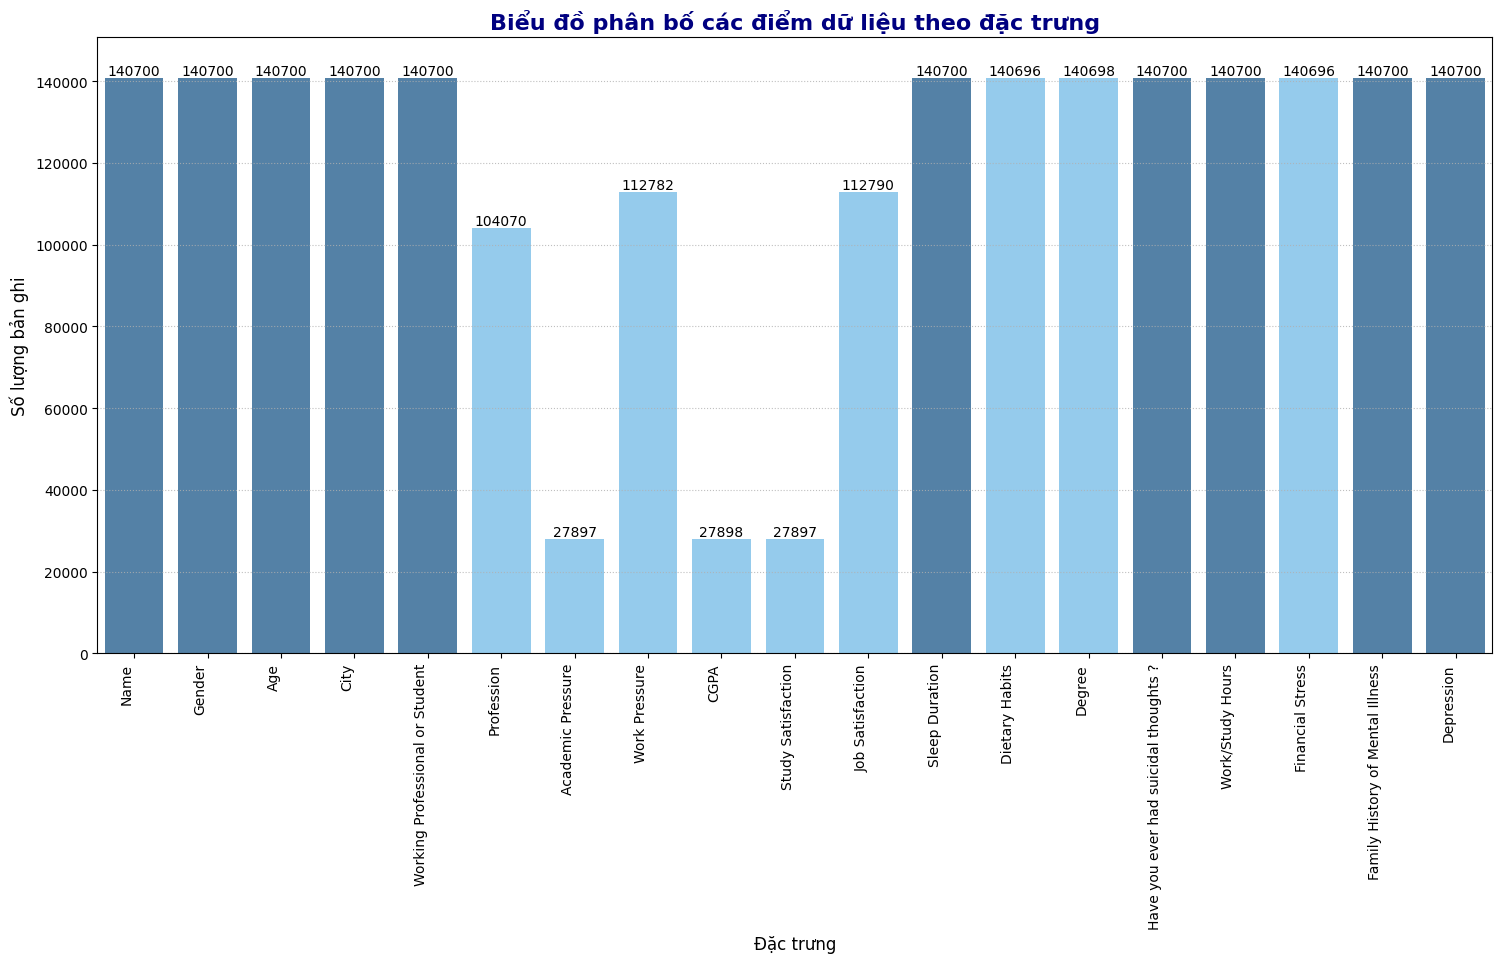

In [11]:
non_missing_counts = mental_data.notna().sum()
plt.figure(figsize=(18, 8))


colors = ['steelblue' if value == num_of_record else 'lightskyblue' for value in non_missing_counts.values]

sns.barplot(x=non_missing_counts.index, y=non_missing_counts.values, palette=colors)

for index, value in enumerate(non_missing_counts.values):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Biểu đồ phân bố các điểm dữ liệu theo đặc trưng", fontsize=16, weight='bold', color="navy")
plt.xlabel("Đặc trưng", fontsize=12)
plt.ylabel("Số lượng bản ghi", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, mental_data.shape[0] + 10000)

plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.show()

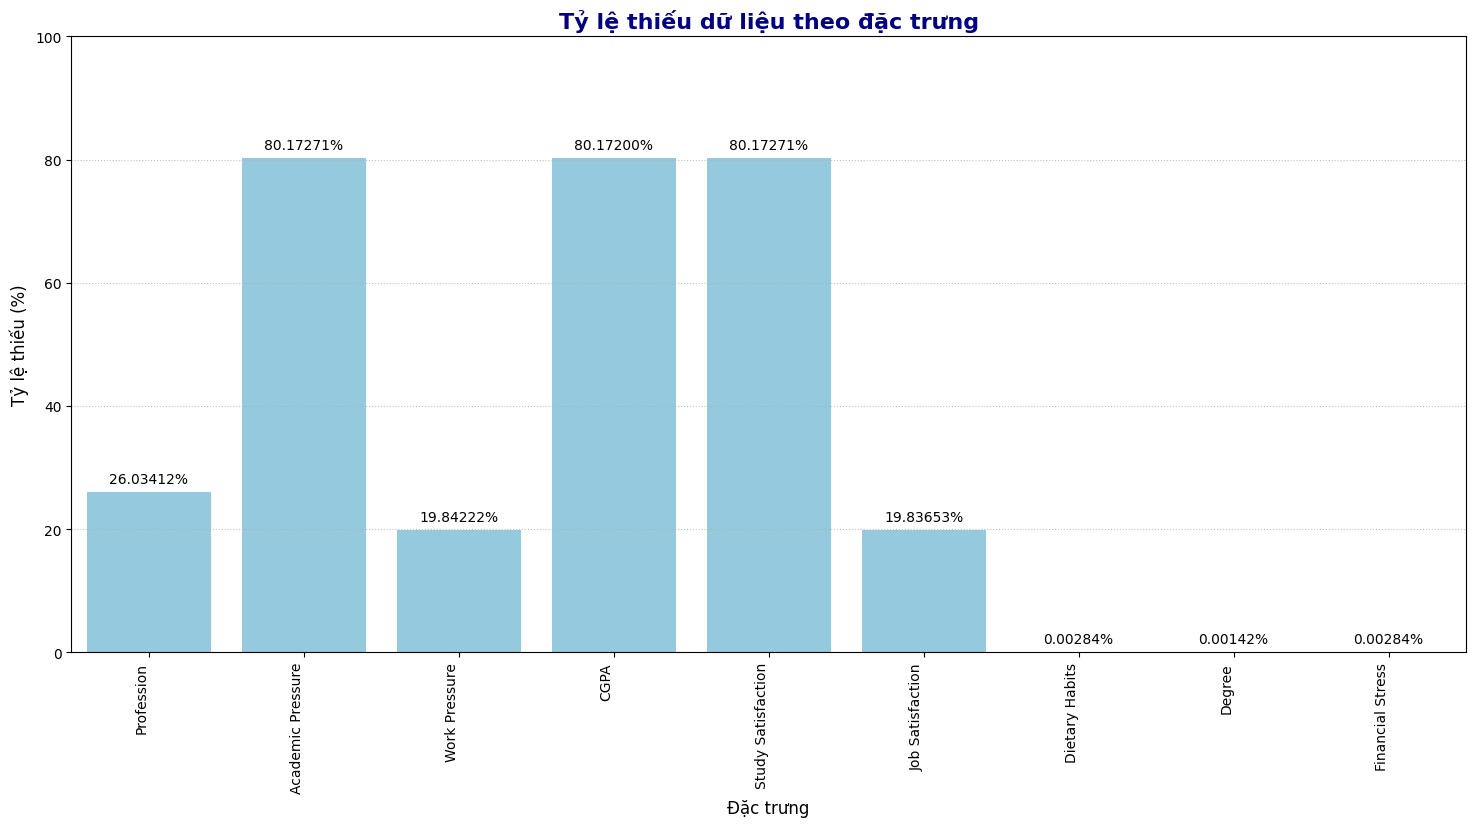

In [12]:
missing_counts = mental_data.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_percentage = (missing_counts / mental_data.shape[0]) * 100


plt.figure(figsize=(18, 8))
sns.barplot(x=missing_counts.index, y=missing_percentage, color='skyblue')

for index, value in enumerate(missing_percentage):
    plt.text(index, value + 1, f"{value:.5f}%", ha='center', va='bottom', fontsize=10)

plt.title("Tỷ lệ thiếu dữ liệu theo đặc trưng", fontsize=16, weight='bold', color="navy")
plt.xlabel("Đặc trưng", fontsize=12)
plt.ylabel("Tỷ lệ thiếu (%)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, 100)

plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.show()


Từ các quan sát trên, ta nhận thấy bộ dữ liệu này có một lượng đáng kể các điểm dữ liệu bị thiếu. Điều này có thể ảnh hưởng lớn đến quá trình huấn luyện và hiệu quả của các mô hình Machine Learning hoặc Deep Learning. Do đó, việc xử lý dữ liệu thiếu là một bước quan trọng và sẽ cần các cách tiếp cận thích hợp để đảm bảo tính chính xác và minh bạch trong quá trình huấn luyện.

## Độ lệch của các biến số

In [13]:
numeric_columns = mental_data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Depression')

<ipython-input-14-76e29291f3b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette="Blues")


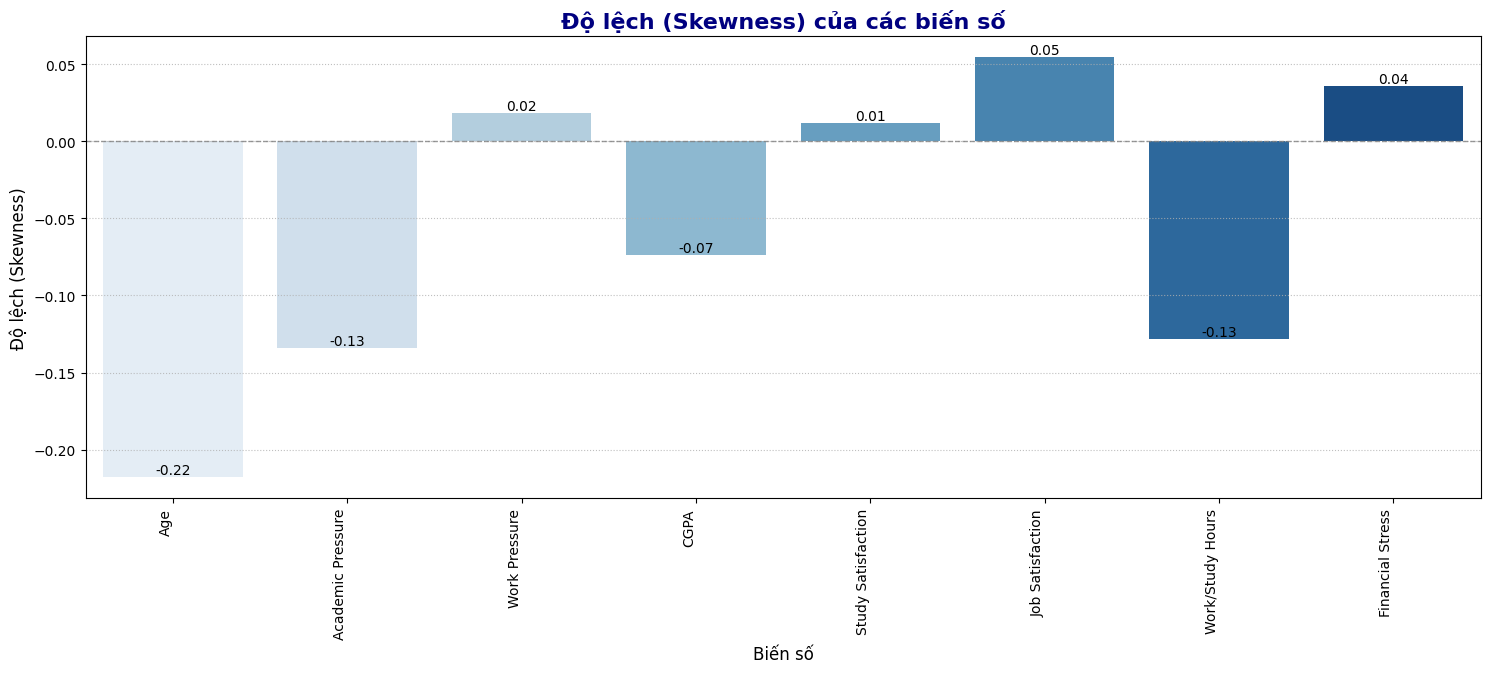

In [14]:
skewness = mental_data[numeric_columns].skew()

plt.figure(figsize=(18, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette="Blues")
for index, value in enumerate(skewness.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
plt.title("Độ lệch (Skewness) của các biến số", fontsize=16, weight='bold', color="navy")
plt.xlabel("Biến số", fontsize=12)
plt.ylabel("Độ lệch (Skewness)", fontsize=12)
plt.xticks(ha='right', rotation = 90)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.8)
plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.show()


## Phân bố của biến mục tiêu

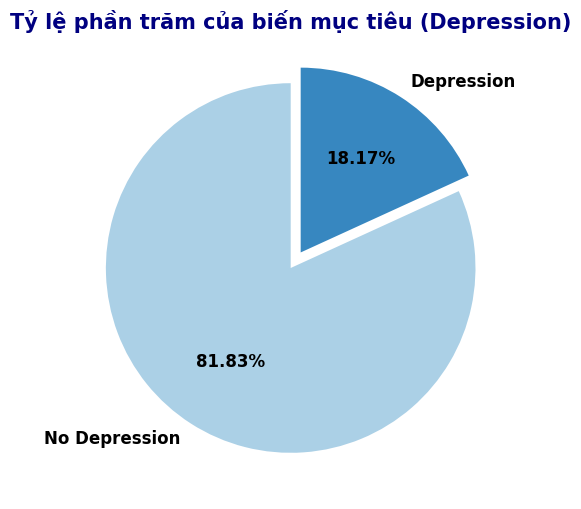

In [15]:
depression_counts = mental_data['Depression'].value_counts(normalize=True) * 100
explode = [0, 0.1] if depression_counts[1] < depression_counts[0] else [0.1, 0]

plt.figure(figsize=(8, 6))
plt.pie(
    depression_counts,
    labels=["No Depression", "Depression"],
    autopct="%.2f%%",
    startangle=90,
    explode=explode,
    colors=sns.color_palette("Blues", len(depression_counts)),
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)


plt.title("Tỷ lệ phần trăm của biến mục tiêu (Depression)", fontsize=15, fontweight='bold', color="navy")
plt.show()


## Phân bố của các đặc trưng theo biến mục tiêu

### Phân bố theo các biến categorical

In [16]:

categorical_columns_to_plot = [
'Gender',
'Working Professional or Student',
'Academic Pressure',
'Work Pressure',
'Study Satisfaction',
'Job Satisfaction',
'Have you ever had suicidal thoughts ?',
'Financial Stress',
'Family History of Mental Illness'
]


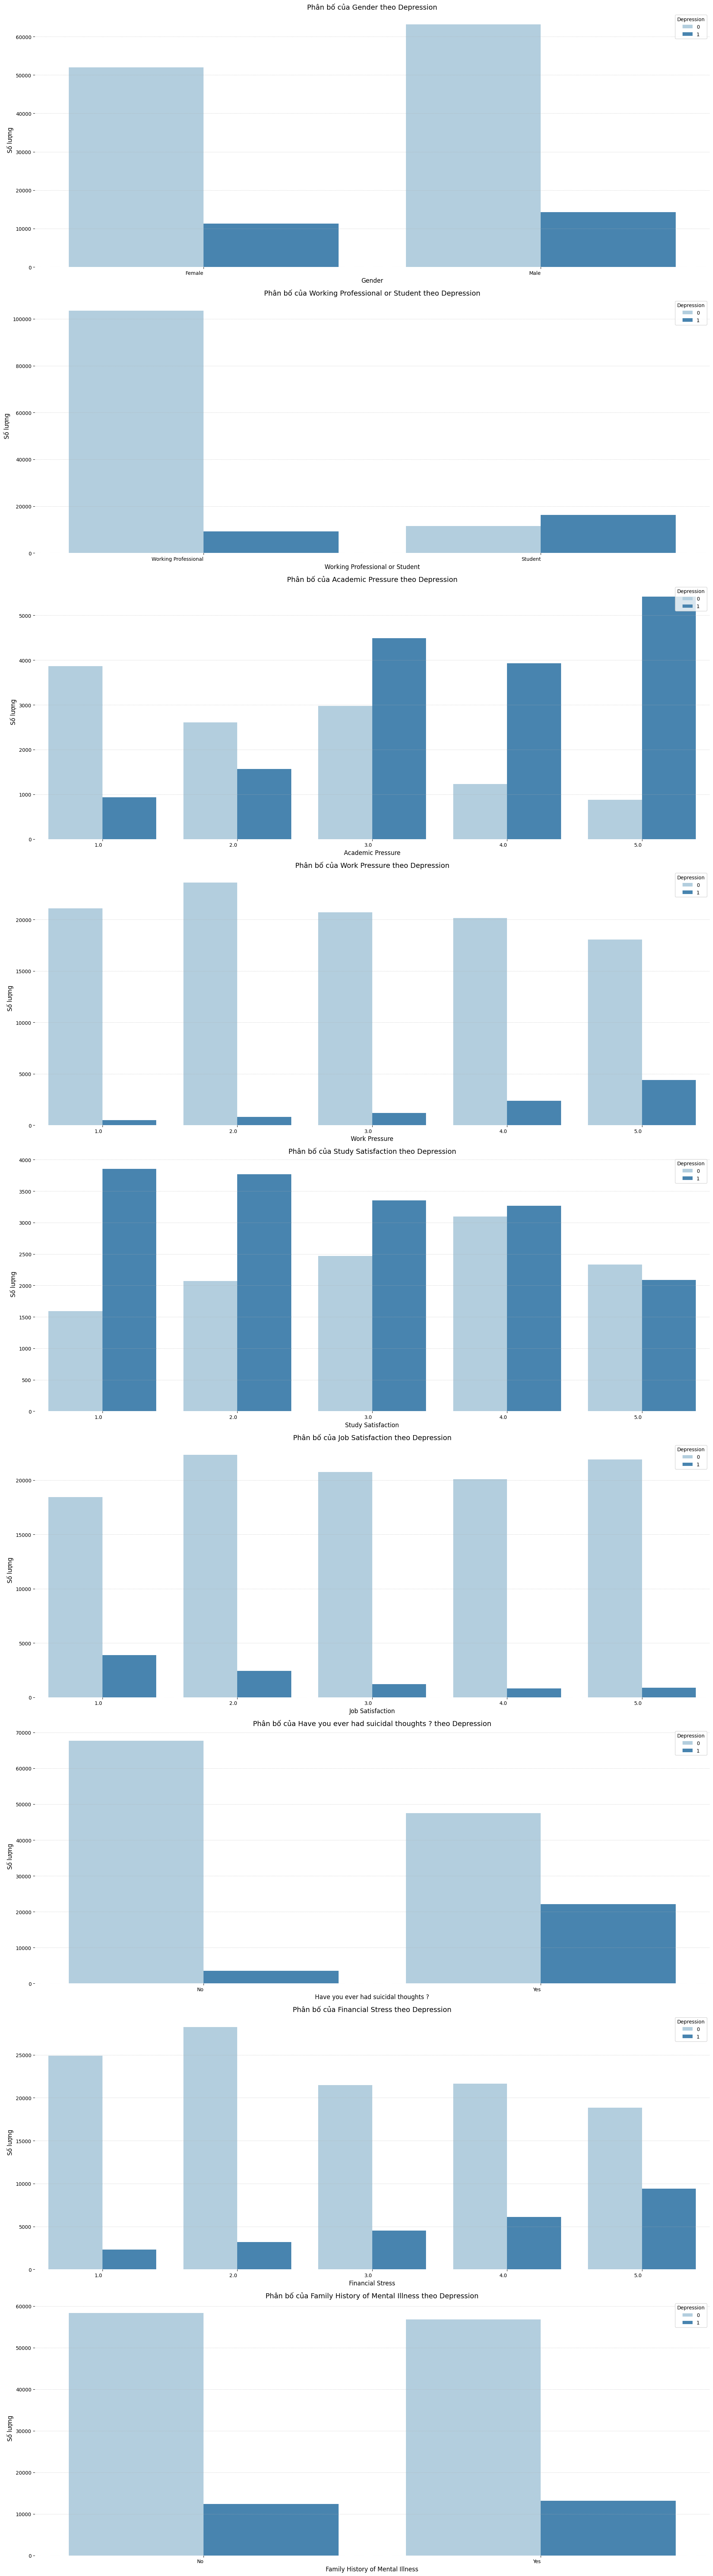

In [17]:
num_plots = len(categorical_columns_to_plot)
plt.figure(figsize=(20, num_plots * 8))

for i, col in enumerate(categorical_columns_to_plot, 1):
    plt.subplot(num_plots, 1, i)
    sns.countplot(data=mental_data, x=col, hue='Depression', palette='Blues')
    plt.title(f'Phân bố của {col} theo Depression', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Số lượng', fontsize=12)
    plt.xticks(ha='right')
    plt.legend(title='Depression', loc='upper right')
    plt.grid(axis='y', linestyle=':', alpha=0.8)
    plt.gca().patch.set_alpha(0)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Phân bố của các biến numerical

In [18]:
numerical_columns_to_plot = [
    'Age',
    'CGPA',
    'Work/Study Hours'
]

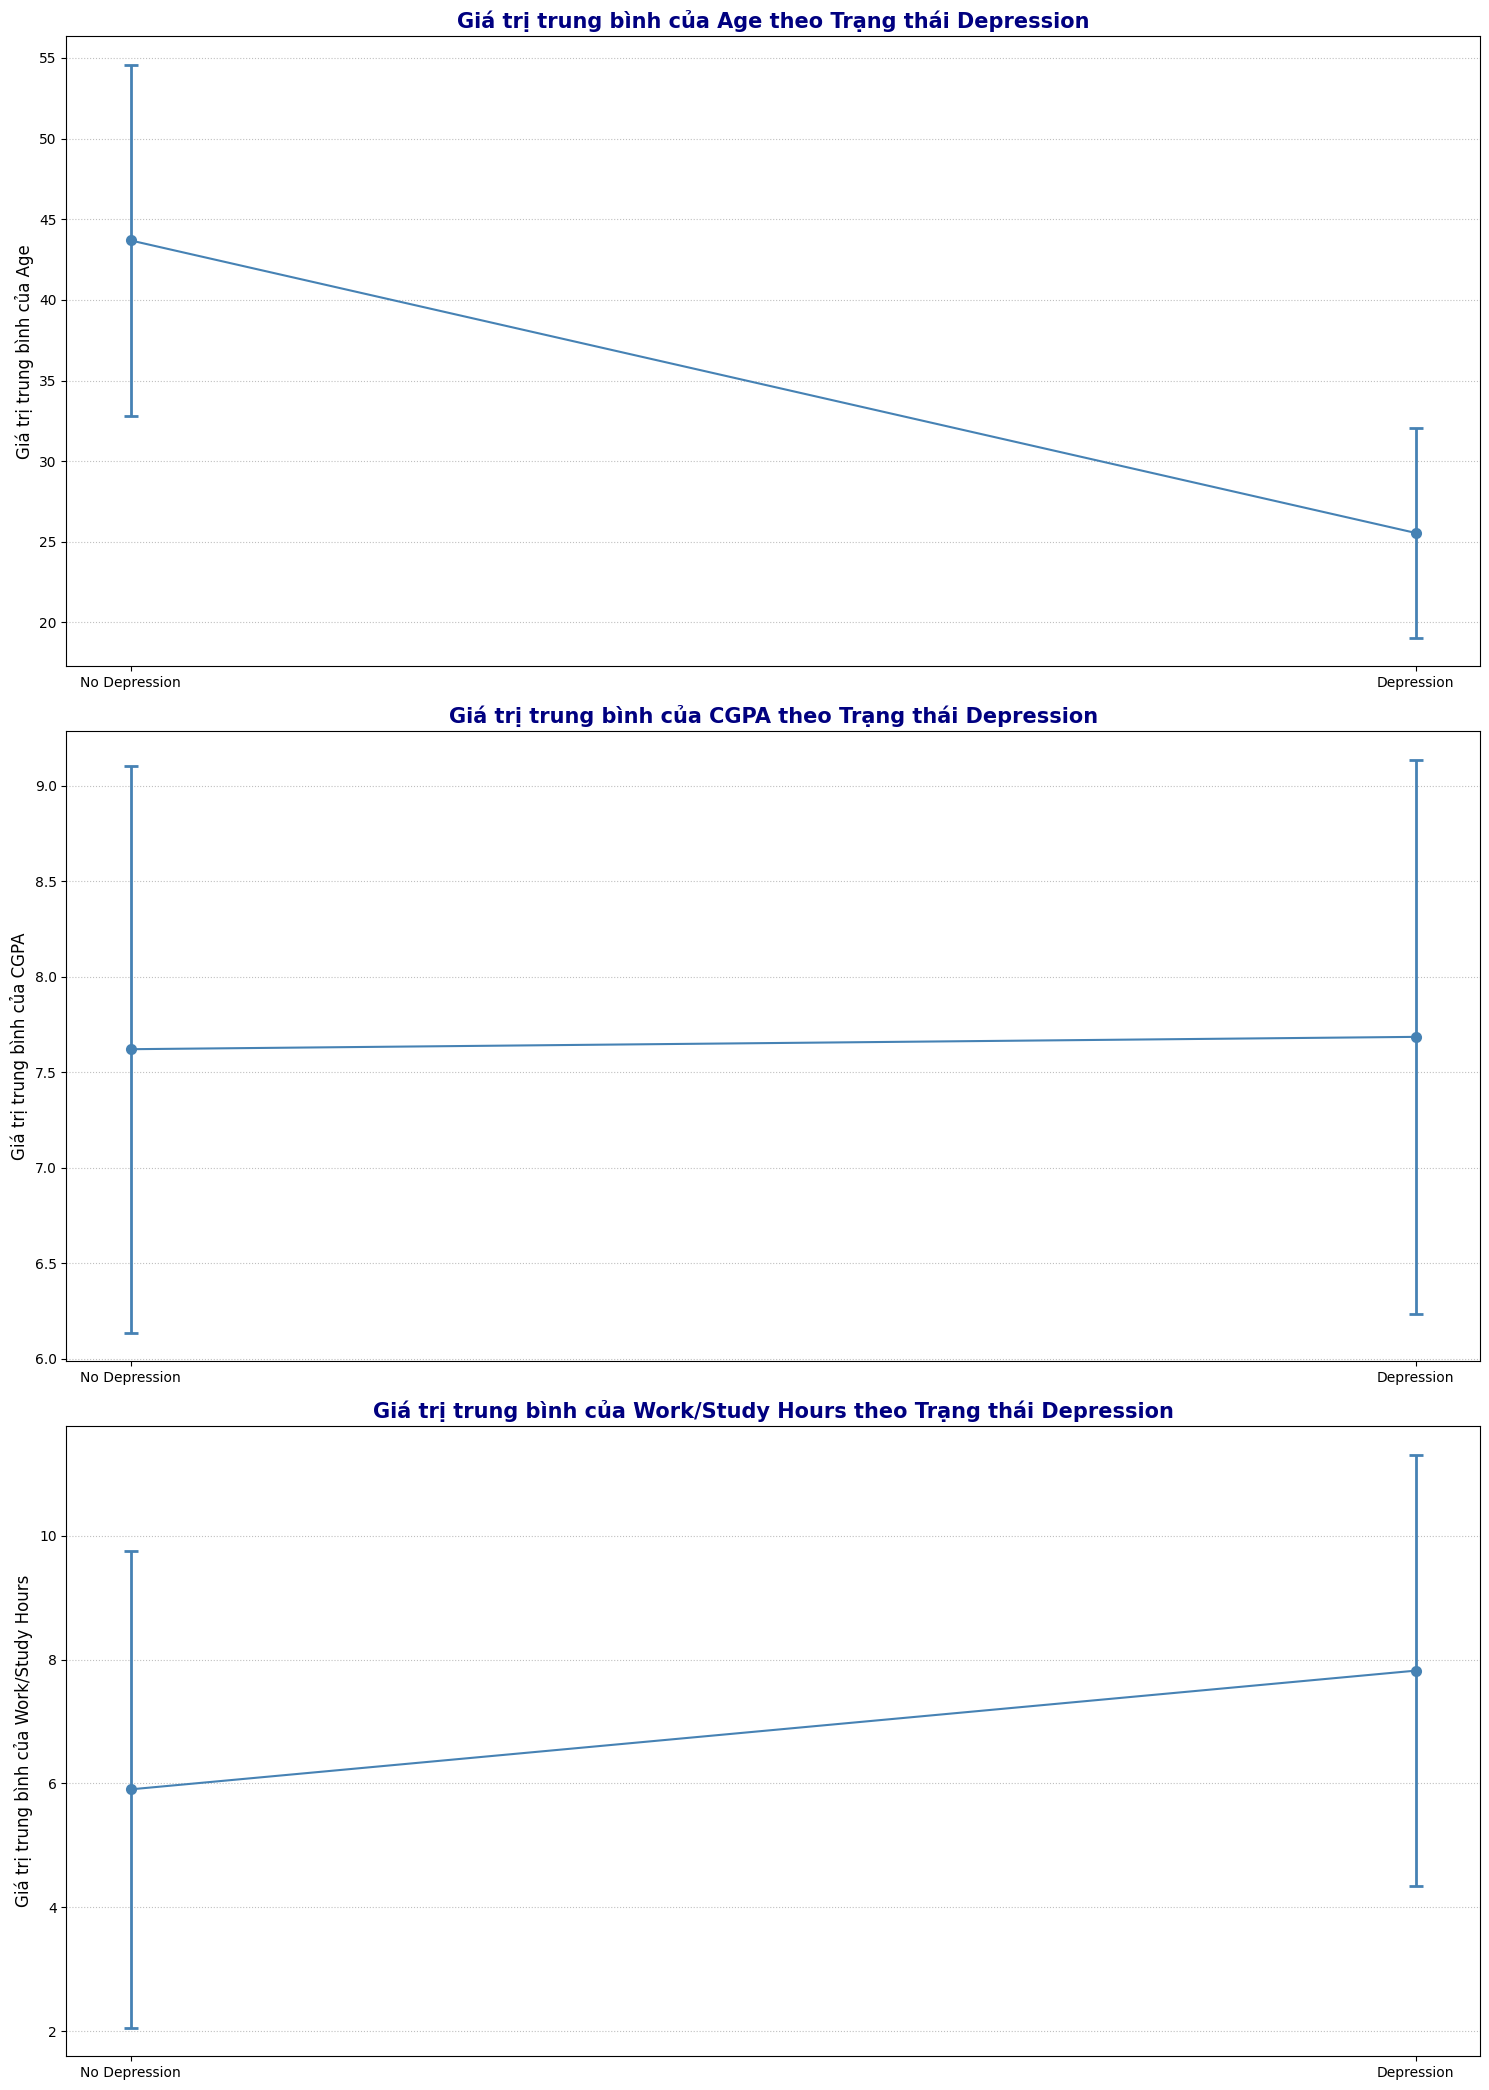

In [19]:
plt.figure(figsize=(15, 21))
for i, col in enumerate(numerical_columns_to_plot, 1):
    mean_values = mental_data.groupby('Depression')[col].mean()
    std_values = mental_data.groupby('Depression')[col].std()


    plt.subplot(len(numerical_columns_to_plot), 1, i)
    plt.errorbar(mean_values.index, mean_values, yerr=std_values, fmt='-o', color='steelblue', capsize=5, elinewidth=2, markeredgewidth=2)
    plt.title(f"Giá trị trung bình của {col} theo Trạng thái Depression", fontsize=15, fontweight='bold', color="navy")
    plt.xlabel("", fontsize=12)
    plt.ylabel(f"Giá trị trung bình của {col}", fontsize=12)
    plt.xticks([0, 1], labels=['No Depression', 'Depression'])
    plt.grid(axis='y', linestyle=':', alpha=0.8)

plt.tight_layout()
plt.show()

### Phân bố theo tuổi

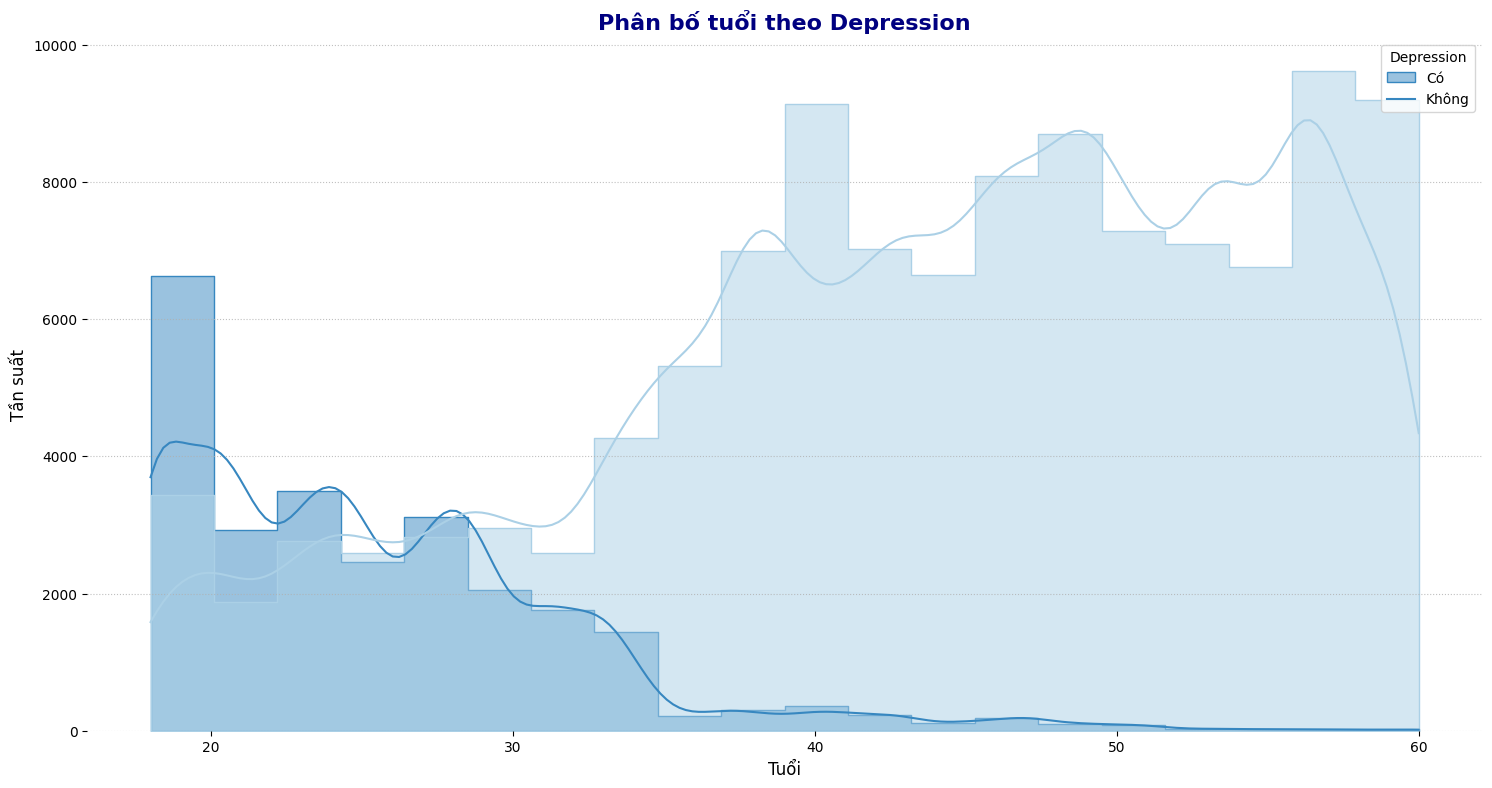

In [20]:
plt.figure(figsize=(18, 9))
sns.histplot(data=mental_data, x='Age', hue='Depression', kde=True, palette='Blues', element='step', bins=20, alpha=0.5)
plt.title("Phân bố tuổi theo Depression", fontsize=16, weight='bold', color="navy")
plt.xlabel("Tuổi", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.legend(title="Depression", labels=["Có", "Không"], loc='upper right')


sns.despine(left=True, bottom=True)
plt.show()

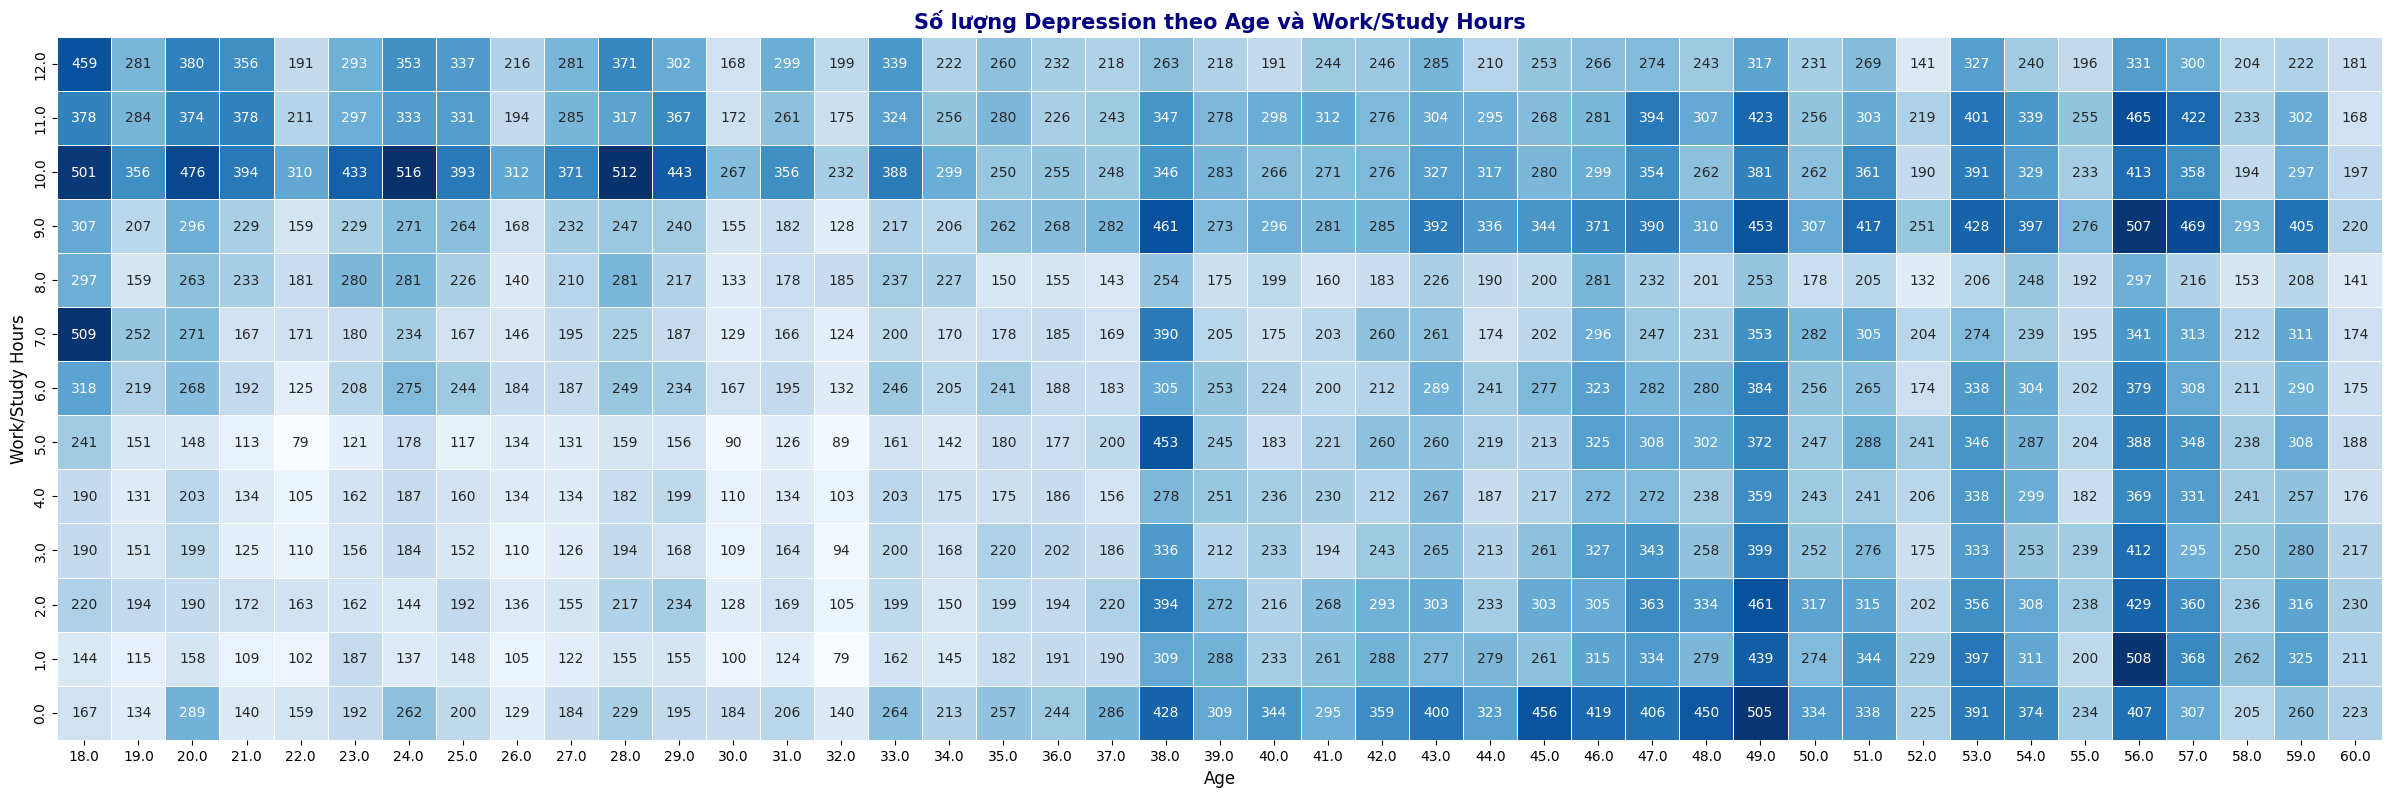

In [21]:
pivot_table = mental_data.pivot_table(values='Depression', index='Work/Study Hours', columns='Age', aggfunc='count').iloc[::-1]

plt.figure(figsize=(30, 30))

# Vẽ heatmap với các ô vuông và tăng kích thước
ax = sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d", cbar=False,
                 linewidths=0.5, square=True,  # Ô vuông
                 vmin=pivot_table.min().min(), vmax=pivot_table.max().max())

# Cấu hình biểu đồ
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Work/Study Hours", fontsize=12)
plt.title("Số lượng Depression theo Age và Work/Study Hours", fontsize=15, fontweight='bold', color="navy")

plt.show()

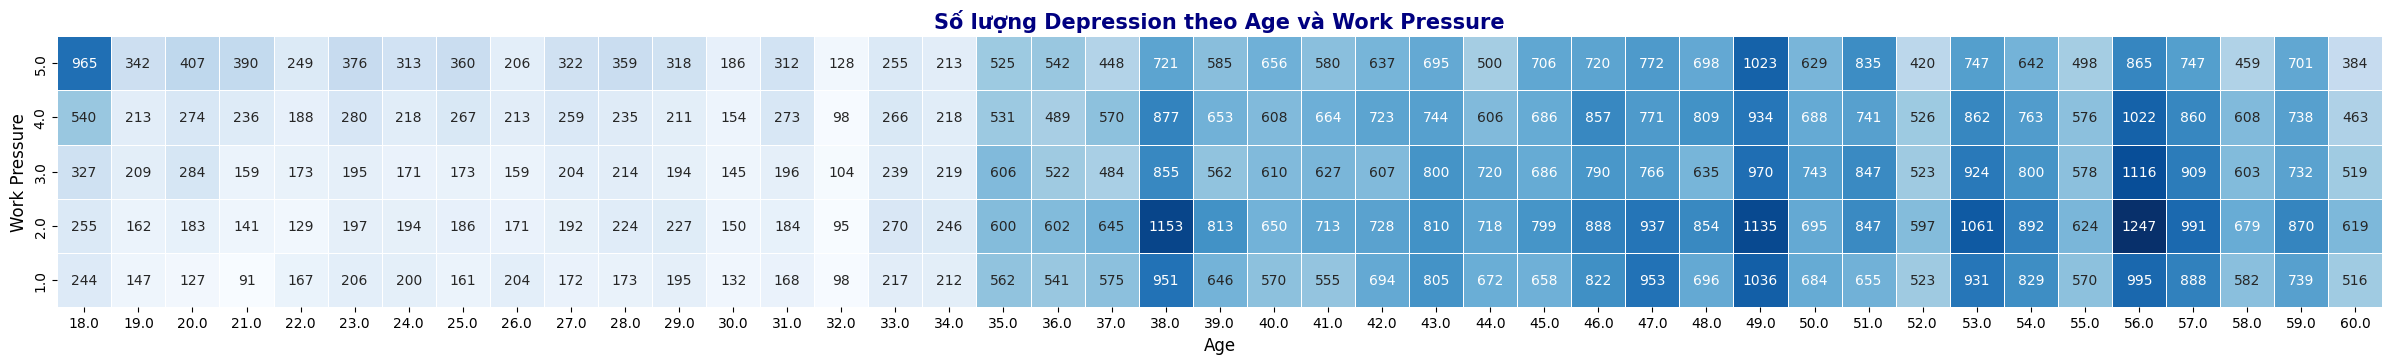

In [22]:
pivot_table = mental_data.pivot_table(values='Depression', index='Work Pressure', columns='Age', aggfunc='count').iloc[::-1]

plt.figure(figsize=(30, 30))

# Vẽ heatmap với các ô vuông và tăng kích thước
ax = sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d", cbar=False,
                 linewidths=0.5, square=True,  # Ô vuông
                 vmin=pivot_table.min().min(), vmax=pivot_table.max().max())

# Cấu hình biểu đồ
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Work Pressure", fontsize=12)
plt.title("Số lượng Depression theo Age và Work Pressure", fontsize=15, fontweight='bold', color="navy")

plt.show()

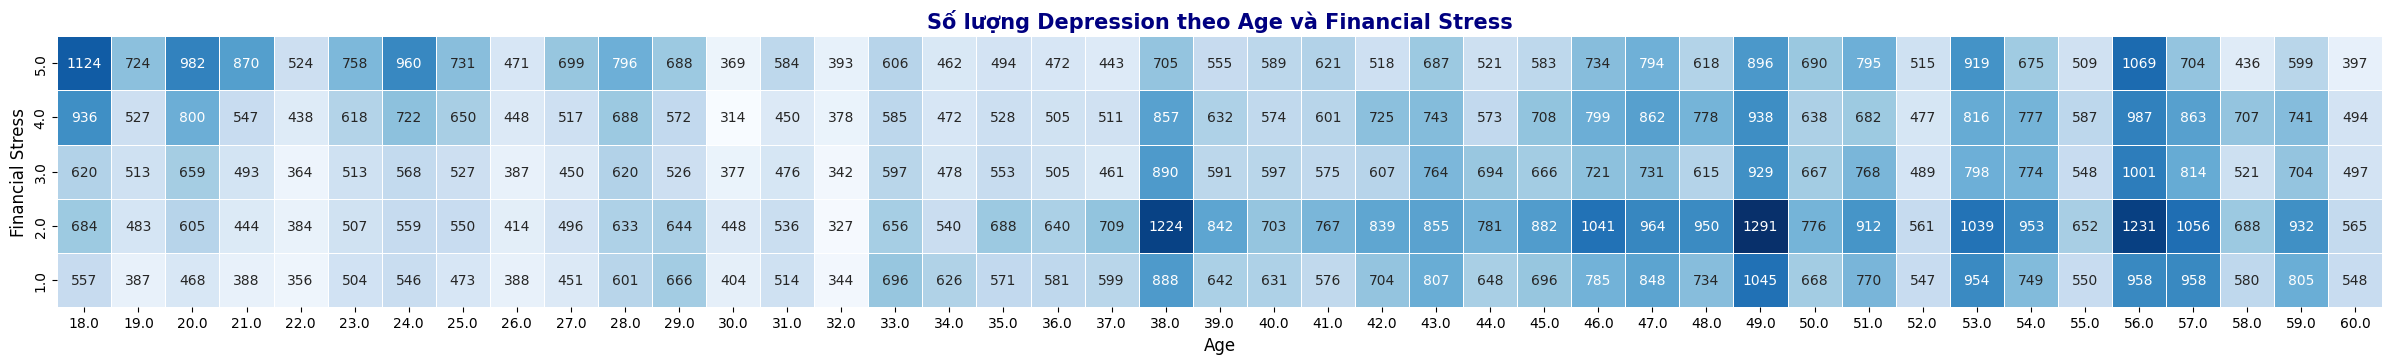

In [23]:
pivot_table = mental_data.pivot_table(values='Depression', index='Financial Stress', columns='Age', aggfunc='count').iloc[::-1]

plt.figure(figsize=(30, 30))

# Vẽ heatmap với các ô vuông và tăng kích thước
ax = sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d", cbar=False,
                 linewidths=0.5, square=True,  # Ô vuông
                 vmin=pivot_table.min().min(), vmax=pivot_table.max().max())

# Cấu hình biểu đồ
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Financial Stress", fontsize=12)
plt.title("Số lượng Depression theo Age và Financial Stress", fontsize=15, fontweight='bold', color="navy")

plt.show()

## Tương quan

# Preprocessing

## Xây dựng pipeline tiền xử lý

In [24]:
X_train = mental_data.drop(columns='Depression')
y_train = mental_data['Depression']

In [25]:
# sampled_data = mental_data.sample(n=1000, random_state=42)
# X_train = sampled_data.drop(columns='Depression')
# y_train = sampled_data['Depression']

Vì các biến như City và Profession có khá nhiều giá trị, viêc áp dụng các phương pháp như **One hot** sẽ dẫn đến việc tăng kích thước của ma trận dữ liệu một cách đáng kể, dẫn đến hiện tượng bùng nổ chiều (dimensionality explosion). Điều này có thể làm giảm hiệu quả của mô hình do thời gian xử lý lâu hơn, yêu cầu tài nguyên tính toán cao hơn, và tăng nguy cơ overfitting. Nên chúng tôi xác định phương pháp nên được áp dụng là **TargetEncoder**

- **TargetEncoder** là một phương pháp mã hóa biến categorical thành các giá trị số numerical dựa trên mối quan hệ giữa biến phân loại và biến mục tiêu . Kết hợp thông tin từ biến mục tiêu vào dữ liệu đầu vào để tăng độ chính xác của mô hình. Tránh tạo quá nhiều biến như trong One-Hot Encoding, đặc biệt khi biến phân loại có số lượng cấp lớn.

- **Target Encoder** hoạt động bằng cách mã hóa các giá trị trong biến categorical thành giá trị numerical dựa trên trung bình của biến mục tiêu.

Các cột không có ý nghĩa như Name và các cột City, Profession đã được xử lý mã hoá riêng sẽ được loại bỏ để đảm bảo rằng chỉ những cột thực sự quan trọng và có ý nghĩa trong việc dự đoán hoặc phân tích được giữ lại. Điều này giúp giảm nhiễu, tối ưu hóa hiệu suất của mô hình, và giảm thời gian xử lý dữ liệu.

In [26]:
encoder = TargetEncoder(cols=['City', 'Profession'])
X_train[['City_encoded', 'Profession_encoded']] = encoder.fit_transform(mental_data[['City', 'Profession']], mental_data["Depression"])

/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [27]:
columns_to_drop = ['Name', 'City', 'Profession']

Sau khi đã loại bỏ các cột dư thừa, tiếp đến chúng tôi tiến hành xây dựng **Pipeline** cho các bước tiền xử lý còn lại.

- Đối với các giá trị numerical:
    - **Xử lý giá trị thiếu**: Vì để tránh ảnh hưởng quá lớn của các giá trị ngoại lai chúng tôi sử dụng **SimpleImputer** với chiến lược median để thay thế các giá trị thiếu bằng trung vị của cột.
    - **Chuẩn hóa dữ liệu**: Áp dụng **StandardScaler** để chuẩn hóa dữ liệu, đảm bảo các đặc trưng numerical có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.
    - **Chuyển đổi kiểu dữ liệu**: Vì bộ dữ liệu quá lớn, nên việc chuyển dữ liệu sang định dạng *float32* bằng FunctionTransformer sẽ giúp tiết kiệm bộ nhớ.


- Đối với các giá trị categorical

    - **Xử lý giá trị thiếu**: Chúng tôi sử dụng **SimpleImputer** với chiến lược most_frequent.
    - **Mã hóa dữ liệu phân loại**: Các biến categorical có nhiều giá trị đã được xử lý trước đó bằng **TargetEncoder** nên tại bước này với các biến còn lại chúng tôi sử dụng **OrdinalEncoder**.



In [28]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [29]:
# def convert_to_float32(x):
#     return x.astype(np.float32)

In [30]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [31]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', columns_to_drop)
    ]
)

In [33]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

Sau khi thực hiện các bước xử lý dữ liệu, chúng tôi tiếp tục sử dụng **IsolationForest** là một phương pháp hiệu quả để phát hiện và xử lý giá trị ngoại lai.

**IsolationForest** là một thuật toán học máy không giám sát được thiết kế đặc biệt để phát hiện giá trị ngoại lai hoặc điểm bất thường (anomalies) trong dữ liệu. **IsolationForest** là một thuật toán nhanh và có thể hoạt động tốt với cả dữ liệu lớn và nhiều đặc trưng.

Việc sử dụng **IsolationForest** sẽ giúp:

- Phát hiện giá trị bất thường một cách tự động.
- Tăng độ chính xác của mô hình
- Giảm nguy cơ overfitting

In [34]:
isolation_forest = IsolationForest(contamination=0.04, random_state=42)
outlier_labels = isolation_forest.fit_predict(X_train_preprocessed)

In [35]:
non_outliers_mask = outlier_labels != -1
X_train_preprocessed = X_train_preprocessed[non_outliers_mask]
y_train = y_train[non_outliers_mask]

# Modeling

Trong quá trình xây dựng mô hình, chúng tôi đã sử dụng kỹ thuật stacking, một phương pháp kết hợp nhiều mô hình dự đoán để tăng cường hiệu suất tổng thể. Cụ thể, chúng tôi đã kết hợp các mô hình cơ sở (Base Models) mạnh mẽ và một mô hình meta (Meta-Model) nhằm tận dụng điểm mạnh của từng thuật toán.

- Các mô hình cơ sở
    - RandomForestClassifier
    - XGBoostClassifier
    - LightGBMClassifier
    - CatBoostClassifier
- Mô hình Meta
    - LogisticRegression

Quy trình Stacking

- Huấn luyện Base Models: Tất cả các Base Models được huấn luyện độc lập trên tập huấn luyện.
- Tạo dữ liệu mới cho Meta-Model: Đầu ra dự đoán của các Base Models được sử dụng làm đặc trưng (features) đầu vào cho mô hình meta.
- Huấn luyện Meta-Model: Mô hình meta (Logistic Regression) học cách kết hợp các đầu ra từ Base Models để tối ưu hóa dự đoán cuối cùng.

Trước khi bắt đầu quá trình huấn luyện mô hình, chúng tôi đã trích xuất 30% dữ liệu từ tập huấn luyện để sử dụng cho việc tìm kiếm và tối ưu hóa tham số (hyperparameter tuning). Điều này nhằm đảm bảo rằng các mô hình cơ sở (Base Models) trong cấu trúc stacking được tối ưu hóa với các tham số tốt nhất, đồng thời vẫn đảm bảo thời gian huấn luyện mô hình cuối cùng không bị kéo dài đáng kể.

In [36]:

X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train_preprocessed, y_train, test_size=0.3, random_state=42
)

# 1. Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)
rf_grid_search.fit(X_train_sub, y_train_sub)
best_rf = rf_grid_search.best_estimator_
print("Best RandomForest Parameters:", rf_grid_search.best_params_)

# 2. XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8],
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)],
    'tree_method': ['gpu_hist']
}
xgb_grid_search = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, verbosity=0),
    xgb_param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)
xgb_grid_search.fit(X_train_sub, y_train_sub)
best_xgb = xgb_grid_search.best_estimator_
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)

# 3. LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8],
    'device': ['cpu'],
    'is_unbalance': [True]
}
lgbm_grid_search = GridSearchCV(
    LGBMClassifier(random_state=42),
    lgbm_param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)
lgbm_grid_search.fit(X_train_sub, y_train_sub)
best_lgbm = lgbm_grid_search.best_estimator_
print("Best LightGBM Parameters:", lgbm_grid_search.best_params_)

# 4. CatBoost
catboost_param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8],
    'task_type': ['GPU']
}
catboost_grid_search = GridSearchCV(
    CatBoostClassifier(random_state=42, verbose=0),
    catboost_param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)
catboost_grid_search.fit(X_train_sub, y_train_sub)
best_catboost = catboost_grid_search.best_estimator_
print("Best CatBoost Parameters:", catboost_grid_search.best_params_)

# --- Kết hợp các mô hình tối ưu vào Stacking ---
meta_model = LogisticRegression()


base_models = [
    ('random_forest', best_rf),
    ('xgboost', best_xgb),
    ('lightgbm', best_lgbm),
    ('catboost', best_catboost)
]

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best RandomForest Parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 1, 'tree_method': 'gpu_hist'}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 10808, number of negative: 52225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 63033, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171466 -> initscore=-1.575275
[LightGBM] [Info] Start training from score -1.575275
[Lig

In [37]:
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False
)

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_clf, X_train_preprocessed, y_train, cv=kfold, scoring='accuracy')
print(f"K-Fold Accuracy: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

[LightGBM] [Info] Number of positive: 18574, number of negative: 89483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 108057, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171891 -> initscore=-1.572286
[LightGBM] [Info] Start training from score -1.572286
[LightGBM] [Info] Number of positive: 14859, number of negative: 71586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 86445, number of used features: 20
[LightGBM] [Info] [

In [39]:
stacking_clf.fit(X_train_preprocessed, y_train)

[LightGBM] [Info] Number of positive: 23190, number of negative: 111882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 135072, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171686 -> initscore=-1.573724
[LightGBM] [Info] Start training from score -1.573724
[LightGBM] [Info] Number of positive: 18552, number of negative: 89505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 108057, number of used features: 20
[LightGBM] [Info]

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lightgbm',
                                LGBMClassifier(device='cpu', is_unbalance=True,
                                               max_depth=8, n_estimators=200,
                                               random_state=42)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7b7059a40d50>)],
                   final_estimator=LogisticRegression())

# Evaluation

In [40]:
test = pd.read_csv("/content/test.csv")
test_ids = test['id']

In [41]:
X_test = test.drop(["id"], axis = 1)

In [42]:
X_test[['City_encoded', 'Profession_encoded']] = encoder.transform(X_test[['City', 'Profession']])

/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [43]:
X_test_preprocessed = preprocessor.transform(X_test)

In [44]:
test_predictions = stacking_clf.predict(X_test_preprocessed)

In [45]:
output = pd.DataFrame({'id': test_ids,
                       'class': test_predictions})

output.to_csv('/content/submission.csv', index=False)
output.head()

,id,class
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


## Trực quan hoá dự đoán trên tập train

F1-Score on Training Set: 0.8866398493666553
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98    111882
           1       0.88      0.89      0.89     23190

    accuracy                           0.96    135072
   macro avg       0.93      0.93      0.93    135072
weighted avg       0.96      0.96      0.96    135072



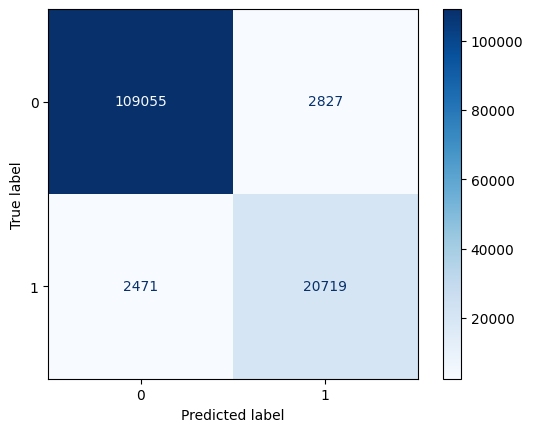

In [46]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_train_pred = stacking_clf.predict(X_train_preprocessed)

# Tính các chỉ số hiệu suất
print("F1-Score on Training Set:", f1_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_clf.classes_)
disp.plot(cmap='Blues')


# Phân tích và kết luận

Từ những kết quả thu được, chúng tôi nhận thấy rằng các phương pháp **Machine Learning** có tiềm năng rất lớn trong việc phát hiện sớm nguy cơ trầm cảm. Điều này chứng minh rằng các giải pháp sử dụng AI có thể phân tích và xử lý hiệu quả dữ liệu liên quan đến sức khỏe tinh thần, từ đó hỗ trợ việc nhận diện các cá nhân có nguy cơ.

Kết quả nghiên cứu không chỉ củng cố tính khả thi của việc áp dụng các công nghệ hiện đại vào lĩnh vực sức khỏe tinh thần mà còn mở ra cơ hội để phát triển các hệ thống hỗ trợ thực tiễn trong tương lai. Những hệ thống này có thể trở thành công cụ đắc lực giúp các chuyên gia y tế, nhà tâm lý học, và nhà hoạch định chính sách xác định và can thiệp kịp thời, góp phần giảm thiểu tác động tiêu cực của trầm cảm đối với xã hội.

Mặc dù phạm vi nghiên cứu này tập trung vào việc chứng minh tính khả thi, nhưng những kết quả thu được sẽ là nền tảng quan trọng cho các nghiên cứu sâu hơn và phát triển các ứng dụng thực tiễn. Chúng tôi hy vọng rằng các giải pháp đề xuất có thể được mở rộng và cải tiến để tối ưu hóa hiệu quả, giúp nâng cao chất lượng cuộc sống và đảm bảo sức khỏe tinh thần cho mọi người.

In [47]:
import pickle
import os

# Tạo thư mục models nếu chưa tồn tại
os.makedirs('models', exist_ok=True)

try:
    # Lưu stacking classifier
    with open('/content/stacking_clf.pkl', 'wb') as f:
        pickle.dump(stacking_clf, f)
    print("Đã lưu stacking classifier thành công!")
except Exception as e:
    print(f"Lỗi khi lưu stacking classifier: {e}")

    # Lưu riêng từng mô hình cơ sở nếu không thể lưu stacking
    for name, model in base_models:
        try:
            with open(f'/content/{name}.pkl', 'wb') as f:
                pickle.dump(model, f)
            print(f"Đã lưu {name} thành công!")
        except Exception as e:
            print(f"Lỗi khi lưu {name}: {e}")

try:
    # Lưu preprocessor
    with open('/content/preprocessor.pkl', 'wb') as f:
        pickle.dump(preprocessor, f)
    print("Đã lưu preprocessor thành công!")
except Exception as e:
    print(f"Lỗi khi lưu preprocessor: {e}")

try:
    # Lưu encoder
    with open('/content/encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)
    print("Đã lưu encoder thành công!")
except Exception as e:
    print(f"Lỗi khi lưu encoder: {e}")

print("Quá trình xuất mô hình đã hoàn tất!")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:54:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Đã lưu stacking classifier thành công!
Đã lưu preprocessor thành công!
Đã lưu encoder thành công!
Quá trình xuất mô hình đã hoàn tất!


In [67]:
import pickle
import pandas as pd
import numpy as np

# Tạo dữ liệu mẫu
sample_data = {
    'id': [1001],
    'Name': ['Nguyễn Văn A'],
            'Age': [25],
            'Gender': ['Male'],
            'City': ['Ho Chi Minh'],
            'Profession': ['Student'],
            'Working Professional or Student': ['Student'],
            'Academic Pressure': ['1'],
            'Work Pressure': ['1'],
            'CGPA': [8.5],
            'Study Satisfaction': ['1'],
            'Job Satisfaction': ['1'],
            'Work/Study Hours': [6],
            'Have you ever had suicidal thoughts ?': ['Yes'],
            'Financial Stress': ['1'],
            'Family History of Mental Illness': ['No'],
            'Sleep Duration': [7],
            'Dietary Habits': ['Good'],
            'Degree': ['Bachelor']
}

# Tạo DataFrame từ dữ liệu mẫu
sample_df = pd.DataFrame(sample_data)

print("Dữ liệu mẫu:")
print("-" * 80)
print(sample_df)
print("-" * 80)

# Tải các mô hình đã lưu
try:
    # Tải mô hình stacking classifier
    with open('/content/stacking_clf.pkl', 'rb') as f:
        stacking_clf = pickle.load(f)

    # Tải preprocessor
    with open('/content/preprocessor.pkl', 'rb') as f:
        preprocessor = pickle.load(f)

    # Tải encoder
    with open('/content/encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)

    print("Đã tải mô hình thành công!")
    print("-" * 80)

    # Chuẩn bị dữ liệu mẫu cho dự đoán
    X_sample = sample_df.drop(["id"], axis=1)

    # Mã hóa các đặc trưng City và Profession
    X_sample[['City_encoded', 'Profession_encoded']] = encoder.transform(X_sample[['City', 'Profession']])

    # Tiền xử lý dữ liệu
    X_sample_preprocessed = preprocessor.transform(X_sample)

    # Dự đoán
    sample_predictions = stacking_clf.predict(X_sample_preprocessed)
    sample_probabilities = stacking_clf.predict_proba(X_sample_preprocessed)[:, 1]

    # Kết quả
    results = pd.DataFrame({
        'id': sample_df['id'],
        'Name': sample_df['Name'],
        'Dự đoán (0: Không trầm cảm, 1: Trầm cảm)': sample_predictions,
        'Xác suất trầm cảm': [f'{prob:.4f}' for prob in sample_probabilities]
    })

    print("Kết quả dự đoán:")
    print(results)

    # Thống kê kết quả
    print("-" * 80)
    print(f"Tổng số mẫu: {len(sample_df)}")
    print(f"Số người được dự đoán có trầm cảm: {sum(sample_predictions)}")
    print(f"Số người được dự đoán không có trầm cảm: {len(sample_predictions) - sum(sample_predictions)}")

except Exception as e:
    print(f"Lỗi: {e}")
    print("Hãy chắc chắn rằng các file mô hình (.pkl) đã được lưu đúng vị trí.")

Dữ liệu mẫu:
--------------------------------------------------------------------------------
     id          Name  Age Gender         City Profession  \
0  1001  Nguyễn Văn A   25   Male  Ho Chi Minh    Student   

  Working Professional or Student Academic Pressure Work Pressure  CGPA  \
0                         Student                 1             1   8.5   

  Study Satisfaction Job Satisfaction  Work/Study Hours  \
0                  1                1                 6   

  Have you ever had suicidal thoughts ? Financial Stress  \
0                                   Yes                1   

  Family History of Mental Illness  Sleep Duration Dietary Habits    Degree  
0                               No               7           Good  Bachelor  
--------------------------------------------------------------------------------
Đã tải mô hình thành công!
--------------------------------------------------------------------------------
Kết quả dự đoán:
     id          Name  Dự đoán

/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/usr/local/lib/python3.11/dist-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [63]:
# Hiển thị dữ liệu sau khi tiền xử lý
print("-" * 80)
print("Dữ liệu sau khi tiền xử lý:")
try:
    # Nếu preprocessor có get_feature_names_out (ví dụ dùng sklearn >= 1.0)
    feature_names = preprocessor.get_feature_names_out()
    X_preprocessed_df = pd.DataFrame(X_sample_preprocessed, columns=feature_names)
except:
    # Nếu không, thì chỉ in mảng numpy
    X_preprocessed_df = pd.DataFrame(X_sample_preprocessed)

print(X_preprocessed_df)
print("-" * 80)

--------------------------------------------------------------------------------
Dữ liệu sau khi tiền xử lý:
   num__Age  num__Academic Pressure  num__Work Pressure  num__CGPA  \
0 -1.242616               -3.285674           -1.588437   1.150666   
1 -0.677373               -1.665686           -0.793900   1.150666   
2 -1.727110               -0.045698            0.000638   1.150666   
3  0.372364                1.574290            0.795176   1.150666   
4 -1.000369                3.194278            1.589714   1.150666   

   num__Study Satisfaction  num__Job Satisfaction  num__Work/Study Hours  \
0                -3.282026              -1.561219              -0.065570   
1                -1.632006              -0.772518               0.712923   
2                 0.018013               0.016183               0.453425   
3                 1.668032               0.804884               0.193928   
4                 3.318052               1.593586               0.972421   

   num__Finan